In [47]:
# standard data imports
import pandas as pd
import numpy as np

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from pydataset import data
from scipy import stats
import env

1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.


In [4]:
# Create the table
observed = pd.DataFrame(
{
    'CodeupStudent':[49,1],
    'NotCodeupStudent':[20,30]
},index=['Uses a Macbook',"Doesn't Use A Macbook"]
)
observed

,CodeupStudent,NotCodeupStudent
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [7]:
observed.dtypes

CodeupStudent       int64
NotCodeupStudent    int64
dtype: object

In [11]:
observed.value_counts()

CodeupStudent  NotCodeupStudent
1              30                  1
49             20                  1
Name: count, dtype: int64

hyp_n = Using a Macbook and being a Codeup student are unrelated to each other (independent)

hyp_a = Using a Macbook and being a Codeup student are related to each other (dependent)

In [6]:
alpha = 0.05

In [18]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [19]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[0 1]
 [1 0]]

Expected
[[0 0]
 [0 0]]

----
chi^2 = 0.0000
p     = 1.0000


In [20]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


2. Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.
State your alpha.
Perform a chi^2 test of independence.
State your conclusion

hyp_n = The number of cylinders in a vehicle are unrelated to the class of vehicle.

hyp_a = The number of cylinders in a vehicle are related to the class of vehicle.

In [23]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [24]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [25]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


hyp_n: trans is independent.
    
hyp_a: class is dependent on trans.

In [26]:
mpg.trans.value_counts()

trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64

In [27]:
mpg['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [28]:
alpha = 0.05

In [29]:
observed = pd.crosstab(mpg.cyl,mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [30]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [31]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


3. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager?

In [32]:
url = env.get_db_url('employees')

query = '''
SELECT * FROM employees
JOIN dept_emp
    USING(emp_no)
JOIN departments
    USING(dept_no)
'''

employees = pd.read_sql(query,url)

In [33]:
employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10011,1953-11-07,Mary,Sluis,F,1990-01-22,1990-01-22,1996-11-09,Customer Service
1,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
2,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
3,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
4,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service


Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

hyp_n = An employee's gender is independent of whether they work in sales or marketing

hyp_a = An employee's gender is not independent of whether they work in sales or marketing

In [35]:
# Saving as new dataframe since I might need the old one still
dept_bool = (employees.dept_name == 'Sales') | (employees.dept_name == 'Marketing')
current_bool = employees.to_date.astype(str) == '9999-01-01'
curr_emp = employees[current_bool & dept_bool]
curr_emp.sample(5)

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
330338,d007,492721,1964-05-06,Samphel,Perly,F,1987-02-18,1987-02-18,9999-01-01,Sales
305401,d007,249816,1958-11-08,Junichi,Kranzdorf,M,1990-09-30,1990-09-30,9999-01-01,Sales
306190,d007,254487,1959-08-03,Kellyn,Busillo,F,1999-09-11,1999-09-11,9999-01-01,Sales
325807,d007,466674,1955-12-24,Kazuhisa,Whittlesey,F,1994-12-24,1996-08-06,9999-01-01,Sales
292867,d007,87059,1953-05-31,Girolamo,Leuchs,M,1988-04-12,1988-04-12,9999-01-01,Sales


In [36]:
# Save the crosstab into observed variable
observed = pd.crosstab(curr_emp.gender,curr_emp.dept_name).T
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [37]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [38]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?
hyp_n = An employee's gender is independent of whether they are or have been a manager.

hyp_a = An employee's gender is not independent of whether they are or have been a manager.

In [39]:
# Read new query

query = '''
SELECT *
FROM dept_manager
'''

manager = pd.read_sql(query,url)
manager.sample(10)

,emp_no,dept_no,from_date,to_date
4,110183,d003,1985-01-01,1992-03-21
23,111939,d009,1996-01-03,9999-01-01
21,111784,d009,1988-10-17,1992-09-08
20,111692,d009,1985-01-01,1988-10-17
13,110765,d006,1989-05-06,1991-09-12
1,110039,d001,1991-10-01,9999-01-01
10,110511,d005,1985-01-01,1992-04-25
18,111400,d008,1985-01-01,1991-04-08
12,110725,d006,1985-01-01,1989-05-06
5,110228,d003,1992-03-21,9999-01-01


In [40]:
# Join employees with manager
emp_manager = employees.merge(manager,how='left',on='emp_no')
emp_manager.sample(10)

,dept_no_x,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date_x,to_date_x,dept_name,dept_no_y,from_date_y,to_date_y
269712,d008,263822,1955-09-11,Seongbin,Ananiadou,F,1985-06-15,1994-06-04,9999-01-01,Research,NaN,NaN,NaN
123691,d002,448699,1956-03-08,Nikolaus,Garnier,M,1989-07-19,1996-09-29,2001-05-25,Finance,NaN,NaN,NaN
300135,d007,219649,1953-12-14,Margo,Benaini,F,1985-07-10,1988-11-29,1990-04-02,Sales,NaN,NaN,NaN
134928,d003,238044,1954-11-30,Leen,Conti,M,1986-01-04,1989-04-17,9999-01-01,Human Resources,NaN,NaN,NaN
286998,d007,53312,1959-04-29,Quingbo,Lagarias,M,1987-11-07,1987-11-07,9999-01-01,Sales,NaN,NaN,NaN
84759,d005,413640,1955-10-08,Takahiro,Millington,M,1990-06-20,1990-06-20,9999-01-01,Development,NaN,NaN,NaN
78587,d005,292072,1962-05-15,Dayanand,Basawa,F,1988-06-23,1990-04-07,1991-02-07,Development,NaN,NaN,NaN
207828,d004,276445,1965-01-27,Atilio,Randi,M,1988-07-02,1988-07-02,9999-01-01,Production,NaN,NaN,NaN
212928,d004,297357,1962-06-07,Khoa,Bakhtari,F,1987-12-24,1987-12-24,9999-01-01,Production,NaN,NaN,NaN
111946,d002,56044,1956-06-18,Rosalie,Baek,F,1991-02-28,1992-01-22,9999-01-01,Finance,NaN,NaN,NaN


In [41]:
# Do some cleanup
emp_manager = emp_manager.rename(columns={
    'from_date_x':'dept_from_date',
    'from_date_y':'mgr_from_date',
    'to_date_x':'dept_to_date',
    'to_date_y':'mgr_to_date',
})

emp_manager = emp_manager.drop(columns=['dept_no_y','is_mgr'],errors='ignore')
emp_manager.sample(10)

,dept_no_x,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_from_date,dept_to_date,dept_name,mgr_from_date,mgr_to_date
244664,d006,108769,1964-10-12,Brewster,Ozeki,M,1997-12-21,1999-08-27,2000-08-14,Quality Management,NaN,NaN
85255,d005,415415,1952-04-15,Abdelkader,Gerlach,F,1991-12-16,1991-12-16,2000-04-25,Development,NaN,NaN
192474,d004,213375,1953-04-28,Lillian,Matzke,M,1990-04-20,1990-04-20,9999-01-01,Production,NaN,NaN
5767,d009,83061,1957-05-10,Adamantios,Baba,M,1990-02-07,1991-03-10,9999-01-01,Customer Service,NaN,NaN
214970,d004,405957,1953-02-01,Zhiguo,Cochrane,M,1985-04-20,1988-11-07,9999-01-01,Production,NaN,NaN
170675,d004,34540,1955-10-17,Vasilis,Kranzdorf,M,1991-11-11,1991-11-11,9999-01-01,Production,NaN,NaN
54439,d005,208005,1961-01-30,Dulce,Facello,M,1985-08-22,1985-08-22,9999-01-01,Development,NaN,NaN
200044,d004,244910,1963-06-21,Huan,Kinley,M,1991-07-26,1991-07-26,9999-01-01,Production,NaN,NaN
268362,d008,244624,1965-01-31,Boaz,Seuren,F,1987-03-27,1987-03-27,9999-01-01,Research,NaN,NaN
128377,d003,39415,1954-07-11,Muneo,Vecchio,F,1994-09-13,1999-12-13,2002-03-16,Human Resources,NaN,NaN


In [42]:
emp_manager['has_been_mgr'] = np.where(emp_manager.mgr_to_date.isna(),False,True)
emp_manager.has_been_mgr.value_counts()


has_been_mgr
False    331579
True         24
Name: count, dtype: int64

In [43]:
observed = pd.crosstab(emp_manager.gender,emp_manager.has_been_mgr)
observed

has_been_mgr,False,True
gender,,
F,132740,13
M,198839,11


In [44]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [45]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


1. Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?
Correlation Test

Does smoking affect when or not someone has lung cancer?
Proportion Test

Is gender independent of a person’s blood type?
Proportion Test

Does whether or not a person has a cat or dog affect whether they live in an apartment?
Proportion Test

Does the length of time of the lecture correlate with a student's grade?
Correlation Test

2. Use the telco_churn data.

Does tenure correlate with monthly charges?

Total charges?

What happens if you control for phone and internet service?

In [48]:
url = env.get_db_url('telco_churn')

tel = pd.read_sql('select * from customers', url)

tel

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [88]:
tel.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
dtype: object

In [49]:
# def strip_column_names(column):
#     return column.strip()

# tel.rename(columns=strip_column_names, inplace=True)

tel['total_charges'].str.strip()

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, Length: 7043, dtype: object

In [95]:
tel.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
dtype: object

In [50]:
tel1 = pd.read_sql('select tenure, monthly_charges from customers', url)

tel1

,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7038,13,55.15
7039,22,85.10
7040,2,50.30
7041,67,67.85


In [59]:
tel1.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [60]:
tel1.monthly_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: monthly_charges, dtype: float64

hypothesis:

hyp_n = There is NO linear relationship between tenure and monthly charges.

hyp_a = There is a linear relationship between tenure and monthly charges. 


In [52]:
alpha = 0.05

In [51]:
# calculate appropriate test statistic and p-value
stats.pearsonr(tel1.tenure, tel1.monthly_charges)

PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [53]:
r, p = stats.pearsonr(tel1.tenure, tel1.monthly_charges)

In [44]:
r

0.24789985628615246

In [45]:
p

4.094044991476844e-99

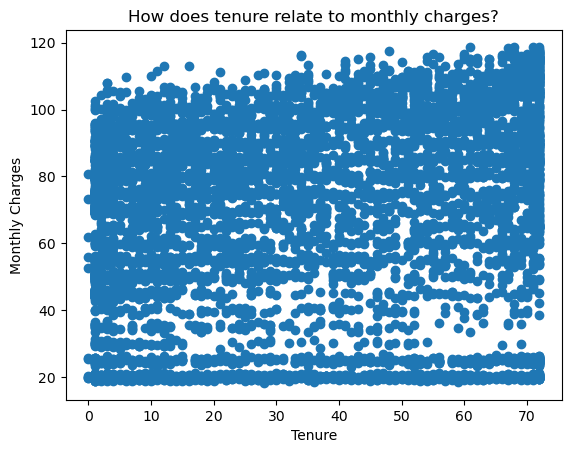

In [54]:
# Do we have a linear relationship? 
# What kind of plot do we want to use when comparing two continuous variables?

plt.scatter(tel1.tenure, tel1.monthly_charges)
plt.title("How does tenure relate to monthly charges?")
plt.ylabel("Monthly Charges")
plt.xlabel("Tenure")
plt.show()


In [54]:
# evauate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


reject the null hypothesis


In [55]:
# Does tenure correlate with total charges?

tel2 = pd.read_sql('select tenure, total_charges from customers', url)

tel2


,tenure,total_charges
0,9,593.3
1,9,542.4
2,4,280.85
3,13,1237.85
4,3,267.4
...,...,...
7038,13,742.9
7039,22,1873.7
7040,2,92.75
7041,67,4627.65


In [66]:
tel2.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [68]:
tel2.total_charges.head()

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: total_charges, dtype: object

hyp_n: There is NO Linear relationship between tenure and total charges.

hyp_a: There is a Linear relationship between tenure and total charges.

In [56]:
tel2.total_charges = pd.to_numeric(tel2.total_charges,errors='coerce')

tel2 = tel2.dropna()

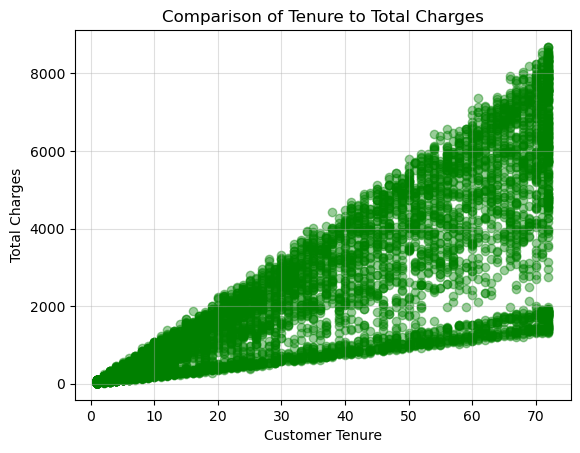

In [57]:
# Plotting tenure against total charges this time
plt.scatter(tel2.tenure,tel2.total_charges,alpha=0.4,color='green')
plt.title('Comparison of Tenure to Total Charges')
plt.xlabel('Customer Tenure')
plt.ylabel('Total Charges')

plt.grid(alpha=0.4)

plt.show()


In [69]:
alpha = 0.05

In [60]:
# calculate
r,p = stats.pearsonr(tel2.tenure, tel2.total_charges)

In [61]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


3. Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [65]:
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
s = pd.read_sql(

'''
select * from salaries
'''

, url)
s

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [66]:
#s['from_date'] = pd.to_datetime(s['from_date'])
#s['to_date'] = pd.to_datetime(s['to_date'],errors = 'coerce')
s['worktime'] = (s['to_date'] - s['from_date'])
s.sort_values(by='worktime', ascending = False)

,emp_no,salary,from_date,to_date,worktime
1532082,261365,113089,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
1600517,268620,90590,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
1228055,229300,60650,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
1694227,278574,92663,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
2611860,475477,52502,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
...,...,...,...,...,...
75304,17922,96722,1992-12-17,1992-12-17,0:00:00
864416,100978,69568,2001-10-04,2001-10-04,0:00:00
1441430,251807,58877,1996-08-03,1996-08-03,0:00:00
2390488,452031,75225,1992-10-16,1992-10-16,0:00:00


In [67]:
#np.isnan(s['worktime']).sum()
s.info()
s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
 4   worktime   object
dtypes: int64(2), object(3)
memory usage: 108.5+ MB


,emp_no,salary,from_date,to_date,worktime
0,10001,60117,1986-06-26,1987-06-26,"365 days, 0:00:00"
1,10001,62102,1987-06-26,1988-06-25,"365 days, 0:00:00"
2,10001,66074,1988-06-25,1989-06-25,"365 days, 0:00:00"
3,10001,66596,1989-06-25,1990-06-25,"365 days, 0:00:00"
4,10001,66961,1990-06-25,1991-06-25,"365 days, 0:00:00"
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,"365 days, 0:00:00"
2844043,499999,67043,1998-11-30,1999-11-30,"365 days, 0:00:00"
2844044,499999,70745,1999-11-30,2000-11-29,"365 days, 0:00:00"
2844045,499999,74327,2000-11-29,2001-11-29,"365 days, 0:00:00"


In [68]:
s.isna().sum()

emp_no       0
salary       0
from_date    0
to_date      0
worktime     0
dtype: int64

Is there a relationship between how long an employee has been with the company and their salary?

TypeError: float() argument must be a string or a real number, not 'datetime.timedelta'

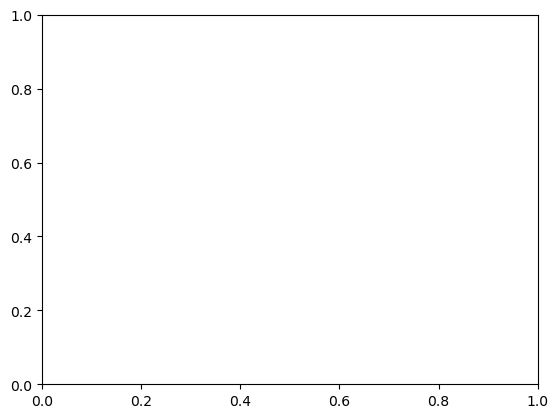

In [72]:
plt.scatter(s.worktime, s.salary)

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

4. Use the sleepstudy data.

Is there a relationship between days and reaction time?

In [ ]:
# Is there a relationship between days and reaction time?

In [73]:
ss = data('sleepstudy')
ss.head()
data('sleepstudy',show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [74]:
r,p = stats.pearsonr(ss.Days,ss.Reaction)

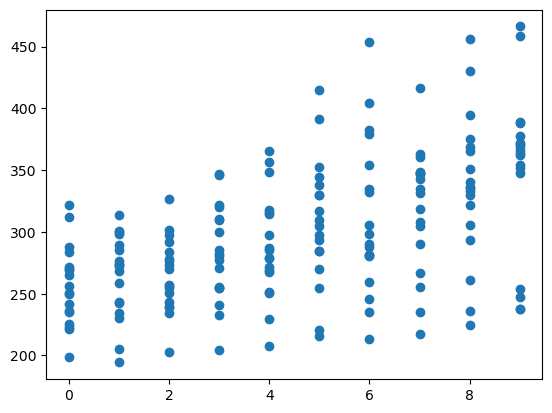

In [75]:
plt.scatter(ss.Days,ss.Reaction)

In [76]:
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis,with a pearson coefficient of 0.5352302262650255


1. Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?
one sample 2-tailed 1 test

Are adults who drink milk taller than adults who don't drink milk?
two sample 1 tailed t test

Is the price of gas higher in Texas or in New Mexico?
two sample 2 tailed test

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
anova t-test


2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

hyp_n: The average time it takes to sell homes is equivalent for the two offices.

hyp_a: the average time it takes to sell homes is different for the two offices. 

In [99]:
alpa = 0.05
sales_1 = 40
sales_2 = 50
mean_1 = 90
mean_2 = 100
std_d_1 = 15
std_d_2 = 20


In [102]:
ttest_1 = stats.ttest_ind_from_stats(
    mean_1,
    std_d_1,
    sales_1,
    mean_2,
    std_d_2,
    sales_2,
    equal_var=True,
    alternative='two-sided',
)
ttest_1

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [103]:
t_stat, p_val = ttest_1

In [104]:
t_stat

-2.6252287036468456

In [105]:
p_val

0.01020985244923939

In [106]:
if p_val < alpha:
    print('We can reject our null hypothesis and say that there is a difference in means')
else:
    print('We fail to reject our null hypothesis')

We can reject our null hypothesis and say that there is a difference in means


3. Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [83]:
hyp_n = 'there is no difference in fuel-efficiency in cars from 2008 vs 1999'
hyp_a = 'there is difference in fuel-efficiency in cars from 2008 vs 1999'

In [107]:
mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,new_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,automatic
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,automatic
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [112]:
mpg.shape

(234, 12)

In [113]:
mpg.drop_duplicates()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,new_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,automatic
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,automatic
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [110]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  new_trans     234 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.8+ KB


In [109]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [114]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,new_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,automatic
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,automatic
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [77]:
car_99 = (mpg[mpg.year==1999]).cty
car_08 = (mpg[mpg.year==2008]).cty

In [78]:
car_99.var() == car_08.var() #failed equal variance test

False

In [79]:
print(stats.shapiro(car_99))
print(stats.shapiro(car_08)) #both passed normality test, as the statistic is close to 1

ShapiroResult(statistic=0.9074150323867798, pvalue=6.315570999504416e-07)
ShapiroResult(statistic=0.9753812551498413, pvalue=0.02993030473589897)


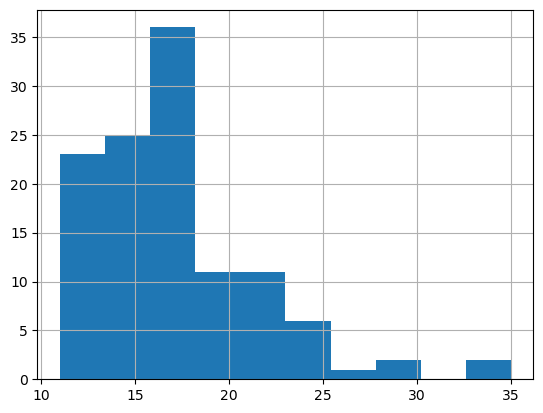

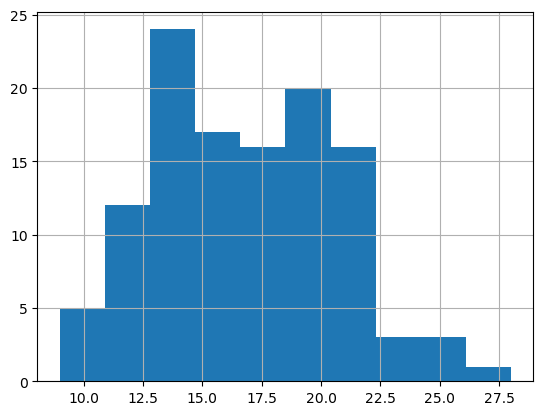

In [80]:
car_99.hist()
plt.show()
car_08.hist()
plt.show()

In [81]:
alpha = 0.05
t, p = stats.ttest_ind(car_99, car_08, equal_var=False)
t, p

(0.5674988409997608, 0.5709289258613233)

In [84]:
if p / 2 > alpha:
    print(f'We fail to reject the null hypothesis:{hyp_n}')
elif t < 0:
    print(f"We fail to reject the null hypothesis:{hyp_n}")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis:there is no difference in fuel-efficiency in cars from 2008 vs 1999


Are compact cars more fuel-efficient than the average car?

In [85]:
mpg.head()
mpg['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [90]:
compact = mpg[mpg['class'].str.startswith('com')].cty
avg = mpg['cty'].mean()

In [88]:
compact.var() == avg.var()

False

In [92]:
print(stats.shapiro(compact))


ShapiroResult(statistic=0.8873253464698792, pvalue=0.0002908567839767784)


In [91]:
alpha = 0.05
t, p = stats.ttest_1samp(compact, avg)
t, p

(6.619104253440891, 3.401744821639401e-08)

In [93]:
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We failed to reject the null hypothesis")

We reject the null hypothesis


Do manual cars get better gas mileage than automatic cars?

2 sample one tail t test

In [94]:
mpg.head()
mpg.trans.value_counts()

trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64

In [95]:
man = mpg[mpg['trans'].str.startswith('auto')].cty
auto = mpg[mpg['trans'].str.startswith('manu')].cty

In [96]:
man.var() == auto.var() #failed the equal variance test

False

In [97]:
print(stats.shapiro(auto))
print(stats.shapiro(man)) # passed normality test

ShapiroResult(statistic=0.9263180494308472, pvalue=0.0002550499339122325)
ShapiroResult(statistic=0.9660839438438416, pvalue=0.0006670693401247263)


In [98]:
alpha = 0.05
t, p = stats.ttest_ind(man, auto, equal_var=False)
t, p

(-4.537543658735826, 1.2633643745317665e-05)

In [99]:
if p / 2 > alpha:
    print(f'We fail to reject the null hypothesis')
elif t < 0:
    print(f"We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis
